<a href="https://colab.research.google.com/github/rajnishdascse/Machine_Learning/blob/gh-pages/Wine_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#This is a machine learning model on classification of different wines



In [17]:
from sklearn import datasets
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler

#Load the data

In [3]:
wine = datasets.load_wine()

In [ ]:
print(wine.DESCR)

In [6]:
wine.data.shape

(178, 13)

In [7]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [8]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
wine.data[0:5]

In [ ]:
wine.target

In [ ]:
len(wine.data)

178

#Plot Alcohol and Malic acid Wine Visualization

Text(0.5, 1.0, 'Wine Feature Distribution')

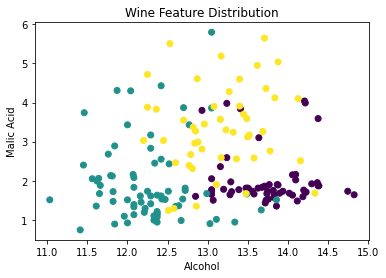

In [11]:
X = wine.data[:, :2]

Y = wine.target

plt.scatter(X[:,0], X[:,1], c=Y)
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('Wine Feature Distribution')

#Sigmoid function

Text(0.5, 1.0, 'Logistic Sigmoid')

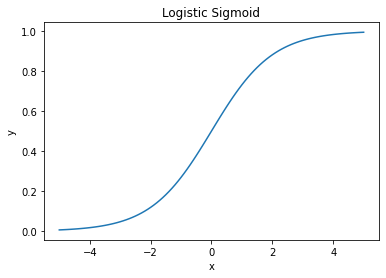

In [12]:
def sigmoid(z):
  return 1.0/(1.0+ math.e**(-z))

x = [i *0.1 for i in range(-50, 51)]
y = [sigmoid(z) for z in x]
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Logistic Sigmoid')

#Prediction

In [28]:
def predict(sample):
  result = 0
  for i in range(len(sample)):
    result = result + weights[i]* sample[i]

  result = result+bias
  return sigmoid(result)

#Lost and cost function

In [18]:
def loss(y_train, y_predicted):
  return -(y_train*math.log(y_predicted)+ (1.0 - y_train)* math.log(1-y_predicted))

#Backpropagation

In [19]:
num_features = wine.data.shape[1]

def train_one_epoch(x_train_sample, y_train_sample):
  cost = 0.0
  dw = [0.0]*num_features
  db = 0.0

  global bias, weights

  m = len(x_train_samples)
  for i in range(m):
    x_sample = x_train_sample[i]
    y_sample = y_train_sample[i]
    predicted = predict(x_sample)
    cost = cost+ loss(y_sample, predicted)

    #dz is derivative of loss function
    dz = predicted - y_sample

    for j in range(len(weights)):
      dw[j] = dw[j]+x_sample[j]*dz
    db = db+dz

    cost = cost/m
    db = db/m
    bias = bias - learning_rate*db
  for j in range(len(weights)):
    dw[j] = dw[j]/m
    weights[j] = weights[j] - learning_rate*dw[j]

  return cost


#Training Model

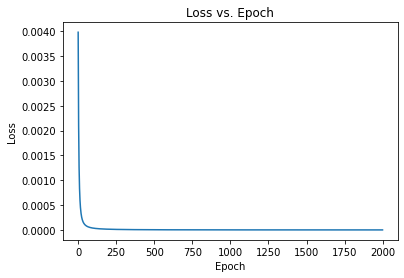

In [24]:

weights = [0.0] * num_features
bias = 0.0

learning_rate = 0.1

epochs = 2000

scaler = StandardScaler()
x_train_samples = scaler.fit_transform(wine.data)
y_train_samples = [1 if y == 2 else 0 for y in wine.target]

loss_array = []
for epoch in range(epochs):
  loss_value = train_one_epoch(x_train_samples, y_train_samples)
  loss_array.append(loss_value)

plt.plot(range(epochs), loss_array)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss vs. Epoch')
plt.show()

#Make Prediction

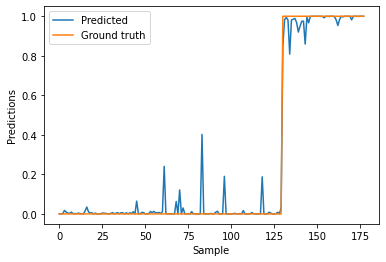

Accuracy: 100.00 %


In [34]:
predictions =[]
m= len(x_train_samples)
correct = 0
for i in range(m):
  sample = x_train_samples[i]
  value = predict(sample)
  predictions.append(value)
  if value >=0.5:
    value =1
  else:
      value = 0
  if value == y_train_samples[i]:
      correct = correct + 1.0
  
plt.plot(range(m), predictions, label = 'Predicted')
plt.plot(range(m), y_train_samples, label = 'Ground truth')
plt.ylabel('Predictions')
plt.xlabel('Sample')
plt.legend(loc= 'best')
plt.show()

print('Accuracy: %.2f %%'%(100*correct/m))

In [35]:
weights

[0.649734005723441,
 0.4989214500398145,
 0.7607992460349687,
 0.460577827525838,
 0.17217416082931786,
 -0.22135040946058587,
 -1.9072092885130756,
 -0.30168481044389867,
 -0.5664413573711404,
 2.134522514624847,
 -1.4664840166109525,
 -1.3054955232048828,
 0.06734821031767299]

In [36]:
bias

-3.2419531965384016